<h1>Machine Learning Classifiers on distance vectors</h1>

<h2>Data Preparation</h2>

In [2]:
import pandas as pd

DATASET_FILEPATH = "../_data/MATCHING_DISTANCE_VECTORS.csv"
MODELS_EXPORT_PATH = "../_models/"

df = pd.read_csv(DATASET_FILEPATH, header=0, sep=",")
df.head()

,BRAND1,BRAND2,BRAND3,MODEL1,MODEL2,MODEL3,MODEL4,GB_RAM,COLOR,EUR_PRICE,MATCH
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1000000.0,1.0,0.0,MATCH
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,1.0,0.0,MATCH
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0,MATCH
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,1.0,0.0,MATCH
4,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1000000.0,0.0,0.0,MATCH


In [3]:
df.describe()

,BRAND1,BRAND2,BRAND3,MODEL1,MODEL2,MODEL3,MODEL4,GB_RAM,COLOR,EUR_PRICE
count,536067.000000,536067.0,536067.0,536067.000000,536067.00000,536067.000000,536067.000000,536067.000000,536067.000000,536067.000000
mean,0.350870,0.0,0.0,0.436837,0.19405,0.029125,0.000386,999128.862349,0.127336,75993.726939
std,0.449487,0.0,0.0,0.473811,0.38126,0.166073,0.019520,29501.835379,0.295093,264658.371884
min,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,1000000.000000,0.000000,30.900000
50%,0.000000,0.0,0.0,0.170000,0.00000,0.000000,0.000000,1000000.000000,0.000000,103.880000
75%,1.000000,0.0,0.0,1.000000,0.00000,0.000000,0.000000,1000000.000000,0.000000,337.000000
max,1.000000,0.0,0.0,1.000000,1.00000,1.000000,1.000000,1000000.000000,1.000000,1000000.000000


In [4]:
df["MATCH"].describe()

count      536067
unique          2
top       UNMATCH
freq       295184
Name: MATCH, dtype: object

In [5]:
# Class variable
df["MATCH"].value_counts()

UNMATCH    295184
MATCH      240883
Name: MATCH, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["MATCH"])
y = df["MATCH"].values

# Train and test sets are stratified, i.e. they both contain the same proportion of classes than the original set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (375246, 10)
y_train: (375246,)
X_test: (160821, 10)
y_test: (160821,)


<h2>Model Evaluation Functions</h2>

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes):
    cm_counts = cm
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   
    cmap=plt.cm.Blues

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm_counts[i, j]) + " (" + str(round(cm[i, j] * 100, 2)) + "%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def display_model_evaluation(y_actual, y_pred, classes):
    
    if len(y_actual) != len(y_pred):
        raise ValueError("Lengths of provided y_actual and y_pred do not match.")
    
    cm = confusion_matrix(y_actual, y_pred)
    acc = accuracy_score(y_actual, y_pred)
    #recall = recall_score(y_actual, y_pred)
    #prec = precision_score(y_actual, y_pred)
    #f1 = f1_score(y_actual, y_pred)
    
    plot_confusion_matrix(cm, classes)
    
    print("Accuracy: {}".format(acc))
    print("Recall: {}".format(recall))
    print("Precision: {}".format(prec))
    print("F1: {}".format(f1))

<h2>K Nearest Neighbours</h2>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time

knn = KNeighborsClassifier()

# Perform a Grid Search to find the best values for the hyperparameters (k and weights)
# using Cross Validation with 4 stratified partitions
param_grid = {
    "n_neighbors": range(1, 5),
    "weights": ["uniform", "distance"]
}

grid_search = GridSearchCV(knn, param_grid=param_grid, cv=4)

start_time = time.time()
grid_search.fit(X_train, y_train)
finish_time = time.time()

print("Grid Search for k-NN took {} seconds.".format(round(finish_time - start_time, 3)))

mean_scores = grid_search.cv_results_["mean_test_score"]
best_params = grid_search.best_params_

best_params

In [9]:
#best_k = best_params["n_neighbors"]
#best_weights = best_params["weights"]

#print("Best values for the k-NN hyperparameters: k = {}, weights = {}".format(best_k, best_weights))

knn = KNeighborsClassifier(n_neighbors=4, weights="distance")
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Accuracy: 0.9413198525068244


NameError: name 'recall' is not defined

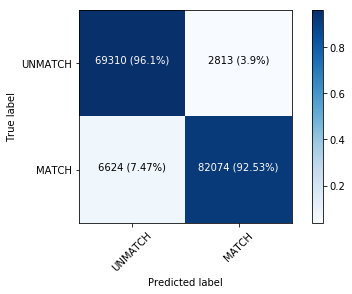

In [41]:
display_model_evaluation(y_test, y_pred, set(y_test))

In [ ]:
from joblib import dump

dump(knn, MODELS_EXPORT_PATH + "knn_distance_vectors.joblib")

<h2>Support Vector Machines<h2>

In [1]:
import gc

# Force Garbage Collector to realease unreferenced memory
#gc.collect()

57